In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# This additional data found from web.
oriData = pd.read_csv("GlobalWeatherRepository.csv")

In [3]:
# There are additional variables in this data that not appere in competition dataset.
oriData.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

In [4]:
# Remove those additional variables
data = oriData[['temperature_celsius', 'condition_text',
       'wind_kph', 'wind_degree', 'pressure_mb', 'precip_mm', 'humidity',
       'cloud', 'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_kph',
       'air_quality_us-epa-index', 'sunrise', 'sunset']]

In [5]:
# Since sunrise and sunset time base variable we decided to convert it into categorical variables call
# sunrise_cat and sunset_cat. Then finally have removed original variables.

data['sunrise'] = pd.to_datetime(data['sunrise'])
data['sunset'] = pd.to_datetime(data['sunset'])

def determine_sunrise_category(x):
    x = pd.Timestamp(x)
    if x <= pd.Timestamp('05:30:00'):
        return 0
    elif x <=  pd.Timestamp('06:00:00') :
        return 1
    elif x <=  pd.Timestamp('06:30:00') :
        return 2
    elif x <=  pd.Timestamp('07:00:00') :
        return 3
    elif x <=  pd.Timestamp('07:30:00') :
        return 4
    else:
        return 5
    
def determine_sunset_category(x):
    x = pd.Timestamp(x)
    if x <= pd.Timestamp('18:00:00'):
        return 0
    elif x <=  pd.Timestamp('18:30:00') :
        return 1
    elif x <=  pd.Timestamp('19:00:00') :
        return 2
    elif x <=  pd.Timestamp('19:30:00') :
        return 3
    elif x <=  pd.Timestamp('20:00:00') :
        return 4
    elif x <= pd.Timestamp('20:30:00'):
        return 5
    else :
        return 6

data['sunrise_cat'] = data['sunrise'].apply(determine_sunrise_category)
data['sunset_cat'] = data['sunset'].apply(determine_sunset_category)
data.drop(["sunset", "sunrise"], axis = 1,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13272\3347551197.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['sunrise'] = pd.to_datetime(data['sunrise'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_13272\3347551197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sunrise'] = pd.to_datetime(data['sunrise'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_13272\3347551197.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['sunset'] = pd.to_datetime(data[

In [6]:
# This new data set has more categories in target variable.
data["condition_text"].unique()

array(['Partly Cloudy', 'Partly cloudy', 'Sunny', 'Light drizzle',
       'Clear', 'Overcast', 'Moderate or heavy rain with thunder',
       'Patchy light rain in area with thunder', 'Fog',
       'Patchy light rain with thunder', 'Patchy rain nearby',
       'Light rain', 'Mist', 'Cloudy', 'Thundery outbreaks in nearby',
       'Moderate rain', 'Light rain shower', 'Moderate rain at times',
       'Moderate or heavy rain shower', 'Heavy rain at times',
       'Patchy light rain', 'Patchy light drizzle',
       'Thundery outbreaks possible', 'Patchy rain possible',
       'Moderate or heavy rain in area with thunder', 'Heavy rain',
       'Torrential rain shower', 'Freezing fog'], dtype=object)

In [7]:
# This is the mapping new data set target variable classes to competition target variable classes
weather_mapping = {
      'Partly Cloudy': 'Partly Cloudy',
      'Partly cloudy': 'Partly Cloudy',
      'Sunny': 'Clear and Sunny',
      'Light drizzle':'Light Precipitation',
      'Clear': 'Clear and Sunny',
      'Overcast': 'Cloudy and Overcast', 
      'Moderate or heavy rain with thunder': 'Thunderstorms',
      'Patchy light rain in area with thunder': 'Light Rain with Thunder',
      'Fog': 'Mist or Fog',
      'Patchy light rain with thunder': 'Light Rain with Thunder' ,
      'Patchy rain nearby': 'Light Precipitation',
      'Light rain': 'Light Precipitation',
      'Mist': 'Mist or Fog' ,
      'Cloudy': 'Cloudy and Overcast',
      'Thundery outbreaks in nearby': 'Thunderstorms',
      'Moderate rain': 'Moderate to Heavy Rain',
      'Light rain shower': 'Rain Showers',
      'Moderate rain at times': 'Moderate to Heavy Rain',
      'Moderate or heavy rain shower': 'Rain Showers',
      'Heavy rain at times': 'Moderate to Heavy Rain',
      'Patchy light rain': 'Light Precipitation' , 
      'Patchy light drizzle': 'Light Precipitation',
      'Thundery outbreaks possible': 'Light Rain with Thunder',
      'Patchy rain possible': 'Light Precipitation',
      'Moderate or heavy rain in area with thunder': 'Thunderstorms', 
      'Heavy rain': 'Moderate to Heavy Rain',
      'Torrential rain shower': 'Rain Showers', 
      'Freezing fog': 'Mist or Fog'
}

In [8]:
# Map existing target variable classes to competition target variable classes
data["condition_text"] = data["condition_text"].replace(weather_mapping)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13272\1130238997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["condition_text"] = data["condition_text"].replace(weather_mapping)


In [9]:
# Convert target variable into numerical
y_mapping = {
    'Light Rain with Thunder':0,
    'Clear and Sunny':1,
    'Partly Cloudy':2,
    'Light Precipitation':3,
    'Cloudy and Overcast':4,
    'Mist or Fog':5,
    'Rain Showers':6,
    'Moderate to Heavy Rain':7,
    'Thunderstorms':8
}
data["condition_text"] = data["condition_text"].replace(y_mapping)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13272\2566596726.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["condition_text"] = data["condition_text"].replace(y_mapping)


#### Feature Engineering

In [10]:
# Temperature difference
data['temp_diff'] = data['temperature_celsius'] - data['feels_like_celsius']

C:\Users\Admin\AppData\Local\Temp\ipykernel_13272\2598041986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['temp_diff'] = data['temperature_celsius'] - data['feels_like_celsius']


In [11]:
# Dew point
def calculate_dew_point(temp_c, humidity):
    a = 17.27
    b = 237.7
    alpha = ((a * temp_c) / (b + temp_c)) + np.log(humidity / 100.0)
    dew_point = (b * alpha) / (a - alpha)
    return dew_point

data['dew_point'] = data.apply(lambda row: calculate_dew_point(row['temperature_celsius'], row['humidity']), axis=1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13272\3014032722.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dew_point'] = data.apply(lambda row: calculate_dew_point(row['temperature_celsius'], row['humidity']), axis=1)


#### Feature Selection

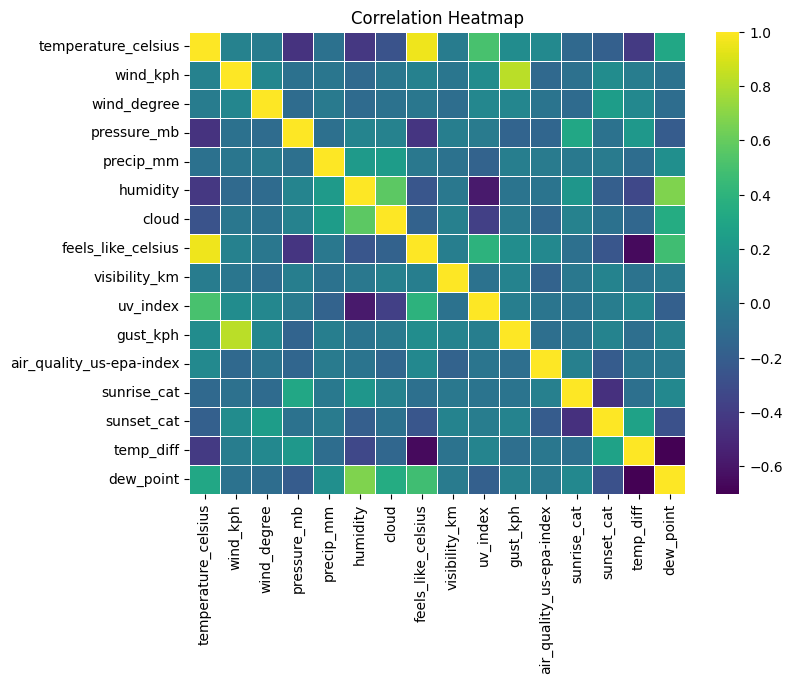

In [12]:
# Create correlation heatmap for identify multicolenearity.
# Here include categorical variables also because they are ordinal variables.

correlation_matrix = data.drop("condition_text",axis = 1).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='viridis', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
# Identified the multicorlinearity and remove those variables.
data = data.drop(["feels_like_celsius", "gust_kph", "temp_diff"], axis = 1)

#### Model Training

In [14]:
# Devide data set to taget y and features X

y = data["condition_text"]
X = data.drop(["condition_text"], axis=1)

In [15]:
# Data has huge class imbalences.
data["condition_text"].value_counts()

condition_text
2    3146
1    2460
3     688
4     298
6     153
5     149
8     120
0     101
7      78
Name: count, dtype: int64

In [16]:
# Performed Up sampling to remove class imbalances.

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

In [19]:
# Performed MinMax Scalling to feature variables.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_balance_scaled = scaler.fit_transform(X_balanced)

In [20]:
# Split data into train test.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_balance_scaled, y_balanced, test_size=0.2, random_state=42)

#### Identify best models 

In [17]:
# Using pycater library trained basic models.

from pycaret.classification import *
s = setup(X_balance_scaled, target = y_balanced, fold= 5, use_gpu=True ,session_id = 123)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves t

,Description,Value
0,Session id,123
1,Target,condition_text
2,Target type,Multiclass
3,Original data shape,"(28314, 14)"
4,Transformed data shape,"(28314, 14)"
5,Transformed train set shape,"(19819, 14)"
6,Transformed test set shape,"(8495, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves t

In [19]:
from pycaret.classification import ClassificationExperiment

exp = ClassificationExperiment()
exp.setup(X_balance_scaled, target = y_balanced, fold= 5, use_gpu=True ,session_id = 123)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves t

,Description,Value
0,Session id,123
1,Target,condition_text
2,Target type,Multiclass
3,Original data shape,"(28314, 14)"
4,Transformed data shape,"(28314, 14)"
5,Transformed train set shape,"(19819, 14)"
6,Transformed test set shape,"(8495, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves t

In [20]:
# These are the model train under pycaret.

best = compare_models(include = ['lr', 'knn', 'nb', 'dt', 'svm', 'rbfsvm', 'gpc', 'mlp',
'ridge','rf','qda','ada','gbc','lda','et','xgboost','lightgbm','dummy'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9650,0.9984,0.9650,0.9650,0.9647,0.9606,0.9607,0.4540
xgboost,Extreme Gradient Boosting,0.9627,0.9982,0.9627,0.9629,0.9625,0.9581,0.9581,1.7200
lightgbm,Light Gradient Boosting Machine,0.9611,0.9977,0.9611,0.9612,0.9609,0.9562,0.9563,19.1300
rf,Random Forest Classifier,0.9537,0.9978,0.9537,0.9537,0.9534,0.9479,0.9480,1.1000
dt,Decision Tree Classifier,0.8747,0.9295,0.8747,0.8744,0.8742,0.8591,0.8591,0.1760
knn,K Neighbors Classifier,0.8574,0.9740,0.8574,0.8572,0.8535,0.8396,0.8405,0.8120
gbc,Gradient Boosting Classifier,0.8527,0.0000,0.8527,0.8529,0.8520,0.8343,0.8345,28.8240
mlp,MLP Classifier,0.7547,0.9630,0.7547,0.7576,0.7538,0.7241,0.7247,21.4480
rbfsvm,SVM - Radial Kernel,0.5608,0.0000,0.5608,0.5722,0.5550,0.5059,0.5091,37.0080
qda,Quadratic Discriminant Analysis,0.5604,0.0000,0.5604,0.5889,0.5529,0.5054,0.5135,0.0340


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [ ]:
# Identifie et and XGB are the bes model according to accuracy.

#### Extra Trees Classifier Tuning

In [18]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 1000)
    max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_float('max_features', 0.1, 1.0)
    
    clf = ExtraTreesClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    
    score = cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)


[I 2024-06-23 15:41:12,619] A new study created in memory with name: no-name-a9da0976-0dc4-4309-83a1-2b60a4374b13
[I 2024-06-23 15:41:34,268] Trial 0 finished with value: 0.8411547320750171 and parameters: {'n_estimators': 641, 'max_depth': 12, 'min_samples_split': 18, 'min_samples_leaf': 7, 'max_features': 0.645549341255127}. Best is trial 0 with value: 0.8411547320750171.
[I 2024-06-23 15:41:53,358] Trial 1 finished with value: 0.7480903220864858 and parameters: {'n_estimators': 921, 'max_depth': 11, 'min_samples_split': 16, 'min_samples_leaf': 19, 'max_features': 0.38263936249401886}. Best is trial 0 with value: 0.8411547320750171.
[I 2024-06-23 15:42:03,990] Trial 2 finished with value: 0.6462845176712995 and parameters: {'n_estimators': 597, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': 0.7014251565887357}. Best is trial 0 with value: 0.8411547320750171.
[I 2024-06-23 15:42:04,650] Trial 3 finished with value: 0.4619660568619042 and parameters: {'n

Best hyperparameters:  {'n_estimators': 412, 'max_depth': 24, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.459640343276098}


In [ ]:
# Best hyperparameters after tuning.
'''
Best hyperparameters:  {'n_estimators': 412, 'max_depth': 24, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.459640343276098}
'''

In [54]:
# Create tuned et model.

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
best_clf = ExtraTreesClassifier(
    n_estimators=412,
    max_depth=24,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=0.459640343276098,
    random_state=42
)
best_clf.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=24, max_features=0.459640343276098,
                     n_estimators=412, random_state=42)

In [55]:
# Evaluate the model on the train set
y_pred = best_clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Train accuracy: {accuracy:.4f}')

Train accuracy: 1.0000


In [56]:
# Evaluate the model on the test set
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.4f}')

Test accuracy: 0.9742


In [57]:
# Apply preprocessing to labeled data on competition data set.

competition_data = pd.read_csv("daily_data.csv")
labeled_data = competition_data[~competition_data["condition_text"].isna()]

labeled_data = labeled_data.drop(["day_id", "city_id"], axis=1)

labeled_data['sunrise'] = pd.to_datetime(labeled_data['sunrise'])
labeled_data['sunset'] = pd.to_datetime(labeled_data['sunset'])
labeled_data['sunrise_cat'] = labeled_data['sunrise'].apply(determine_sunrise_category)
labeled_data['sunset_cat'] = labeled_data['sunset'].apply(determine_sunset_category)
labeled_data.drop(["sunset", "sunrise"], axis = 1,inplace=True)

labeled_data["condition_text"] = labeled_data["condition_text"].replace(y_mapping)

labeled_data['dew_point'] = labeled_data.apply(lambda row: calculate_dew_point(row['temperature_celsius'], row['humidity']), axis=1)
labeled_data = labeled_data.drop(["feels_like_celsius", "gust_kph"], axis = 1)

labeled_y = data["condition_text"]
labeled_X = data.drop(["condition_text"], axis=1)

labeled_X_scaled = scaler.transform(labeled_X)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11296\3354762677.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  labeled_data['sunrise'] = pd.to_datetime(labeled_data['sunrise'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_11296\3354762677.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  labeled_data['sunset'] = pd.to_datetime(labeled_data['sunset'])


In [59]:
# Evaluate the model on the labeled data in competition data set.
from sklearn.metrics import accuracy_score

y_pred = best_clf.predict(labeled_X_scaled)
accuracy = accuracy_score(labeled_y, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9893


#### XGB Classifier Tuning

In [66]:
import optuna
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

def objective(trial):
    
    params = {
        'objective': 'multi:softmax',
        'num_class': 9,
        'eval_metric': 'merror',
        'booster': 'gbtree',
        'verbosity': 0,
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-1,),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True)
    }
    
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    accuracies = []
    for train_index, val_index in skf.split(X_train, y_train):
        train_X, val_X = X_train[train_index], X_train[val_index]
        train_y, val_y = y_train[train_index], y_train[val_index]

        model = xgb.XGBClassifier(**params)
        model.fit(train_X, train_y)

        y_pred = model.predict(val_X)
        accuracy = accuracy_score(val_y, y_pred)
        accuracies.append(accuracy)

    accuracy_mean = sum(accuracies) / len(accuracies)
    
    return accuracy_mean

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-06-23 23:23:19,782] A new study created in memory with name: no-name-39bb49e2-0741-41d0-8889-db595df07a03
[I 2024-06-23 23:23:34,809] Trial 0 finished with value: 0.8955931268454952 and parameters: {'n_estimators': 931, 'max_depth': 9, 'learning_rate': 0.022736662865692203, 'min_child_weight': 8, 'subsample': 0.6809919268028446, 'colsample_bytree': 0.8897969067952985, 'gamma': 2.9862205673475085e-08}. Best is trial 0 with value: 0.8955931268454952.
[I 2024-06-23 23:23:39,172] Trial 1 finished with value: 0.899902389338726 and parameters: {'n_estimators': 358, 'max_depth': 7, 'learning_rate': 0.09195959427762834, 'min_child_weight': 4, 'subsample': 0.8765918481997241, 'colsample_bytree': 0.7316387760093063, 'gamma': 0.21528888765905255}. Best is trial 1 with value: 0.899902389338726.
[I 2024-06-23 23:23:53,333] Trial 2 finished with value: 0.9001810366934202 and parameters: {'n_estimators': 749, 'max_depth': 6, 'learning_rate': 0.010463437491134937, 'min_child_weight': 1, 'subsa

KeyboardInterrupt: 

In [ ]:
# Best hyperparameters after tuning.

''' 
Params: 
    n_estimators: 933
    max_depth: 13
    learning_rate: 0.07217820981737245
    min_child_weight: 1
    subsample: 0.555712987357114
    colsample_bytree: 0.8206661223436071
    gamma: 1.3992363314631161e-08
'''

In [21]:
# Create tuned XGB model.
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    n_estimators= 900,
    max_depth=10,
    learning_rate=0.0530299965931672,
    min_child_weight=1,
    subsample=0.732772117573613,
    colsample_bytree=0.7849649752192749,
    gamma=3.7951933805033e-05
)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7849649752192749, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=3.7951933805033e-05,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0530299965931672,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=900, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [22]:
# Evaluate the model on the train set
y_pred = xgb_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Train accuracy: {accuracy:.4f}')

NameError: name 'accuracy_score' is not defined

In [ ]:
# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.4f}')

Test accuracy: 0.9779


In [23]:
# Apply preprocessing to labeled data on competition data set.

competition_data = pd.read_csv("daily_data.csv")
labeled_data = competition_data[~competition_data["condition_text"].isna()]

labeled_data = labeled_data.drop(["day_id", "city_id"], axis=1)

labeled_data['sunrise'] = pd.to_datetime(labeled_data['sunrise'])
labeled_data['sunset'] = pd.to_datetime(labeled_data['sunset'])
labeled_data['sunrise_cat'] = labeled_data['sunrise'].apply(determine_sunrise_category)
labeled_data['sunset_cat'] = labeled_data['sunset'].apply(determine_sunset_category)
labeled_data.drop(["sunset", "sunrise"], axis = 1,inplace=True)

labeled_data["condition_text"] = labeled_data["condition_text"].replace(y_mapping)

labeled_data['dew_point'] = labeled_data.apply(lambda row: calculate_dew_point(row['temperature_celsius'], row['humidity']), axis=1)
labeled_data = labeled_data.drop(["feels_like_celsius", "gust_kph"], axis = 1)

labeled_y = data["condition_text"]
labeled_X = data.drop(["condition_text"], axis=1)

labeled_X_scaled = scaler.transform(labeled_X)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8864\950593853.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  labeled_data['sunrise'] = pd.to_datetime(labeled_data['sunrise'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_8864\950593853.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  labeled_data['sunset'] = pd.to_datetime(labeled_data['sunset'])


In [24]:
# Evaluate the model on the labeled data in competition data set.
from sklearn.metrics import accuracy_score

y_pred = xgb_model.predict(labeled_X_scaled)
accuracy = accuracy_score(labeled_y, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9905


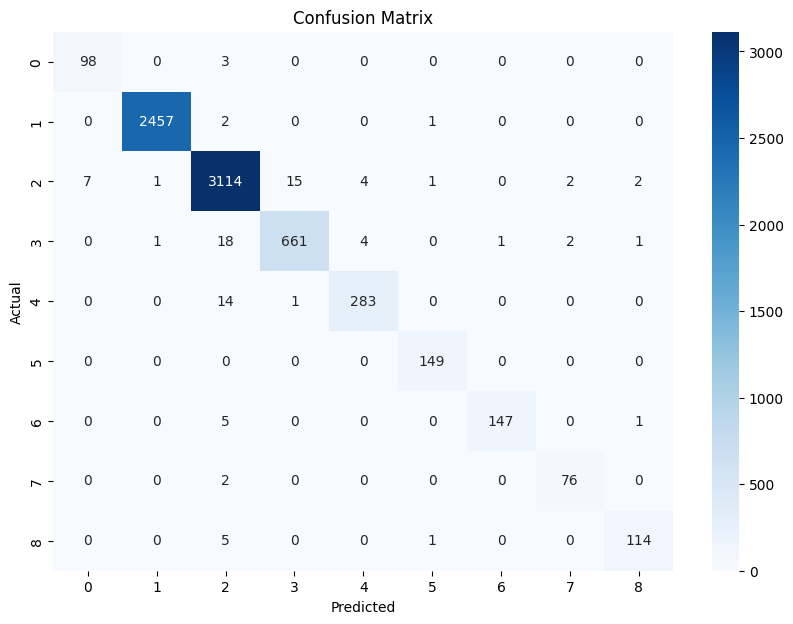

In [91]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labeled_y, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

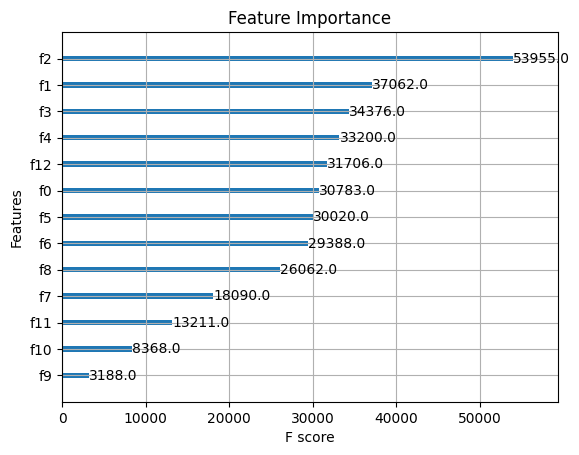

In [21]:
# Feature importance of the model

from xgboost import plot_importance
xgb.plot_importance(xgb_model)
plt.title('Feature Importance')
plt.show()

#### Stacking Classifier (ET, XGB)

In [82]:
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

estimators = [
    ('xgb', XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')),
    ('et', ExtraTreesClassifier(n_estimators=100, random_state=42))
]

stacking_model = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression()
)

stacking_model.fit(X_train, y_train)

StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='mlogloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              lea...ne, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...)),
                               ('et', ExtraTreesClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

In [83]:
# Evaluate the model on the train set
y_pred = stacking_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Train accuracy: {accuracy:.4f}')

Train accuracy: 1.0000


In [85]:
# Evaluate the model on the test set
y_pred = stacking_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.4f}')

Test accuracy: 0.9806


In [86]:
# Apply preprocessing to labeled data on competition data set.

competition_data = pd.read_csv("daily_data.csv")
labeled_data = competition_data[~competition_data["condition_text"].isna()]

labeled_data = labeled_data.drop(["day_id", "city_id"], axis=1)

labeled_data['sunrise'] = pd.to_datetime(labeled_data['sunrise'])
labeled_data['sunset'] = pd.to_datetime(labeled_data['sunset'])
labeled_data['sunrise_cat'] = labeled_data['sunrise'].apply(determine_sunrise_category)
labeled_data['sunset_cat'] = labeled_data['sunset'].apply(determine_sunset_category)
labeled_data.drop(["sunset", "sunrise"], axis = 1,inplace=True)

labeled_data["condition_text"] = labeled_data["condition_text"].replace(y_mapping)

labeled_data['dew_point'] = labeled_data.apply(lambda row: calculate_dew_point(row['temperature_celsius'], row['humidity']), axis=1)
labeled_data = labeled_data.drop(["feels_like_celsius", "gust_kph"], axis = 1)

labeled_y = data["condition_text"]
labeled_X = data.drop(["condition_text"], axis=1)

labeled_X_scaled = scaler.transform(labeled_X)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11296\950593853.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  labeled_data['sunrise'] = pd.to_datetime(labeled_data['sunrise'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_11296\950593853.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  labeled_data['sunset'] = pd.to_datetime(labeled_data['sunset'])


In [87]:
# Evaluate the model on the labeled data in competition data set.
from sklearn.metrics import accuracy_score

y_pred = xgb_model.predict(labeled_X_scaled)
accuracy = accuracy_score(labeled_y, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9869
